In [1]:
import os
import glob
import re
import numpy as np
import PsiMarginal_fd
import datetime
import time
import shutil

In [2]:
def save_merged_data(TEMP):
    
    if TEMP == False:
        FID = input('add file ID:')
    else:
        FID = "TEMP"

    global file_path_TEMP
    global timestamp

    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d_%H-%M')
    file_name_data = FID +"_"+ bs + "_" + hv +"_data_"+ timestamp +".npy"

    file_name_stim = FID +"_"+ bs + "_" + hv +"_stim_"+ timestamp +".npy"
    file_name_response = FID +"_"+ bs + "_" + hv +"_response_"+ timestamp +".npy"
    file_name_postmean = FID +"_"+ bs + "_" + hv +"_postmean_"+ timestamp +".npy"
    file_name_poststd = FID +"_"+ bs + "_" + hv +"_poststd_"+ timestamp +".npy"
    file_name_stimRange = FID +"_"+ bs + "_" + hv +"_stimRange_"+ timestamp +".npy"

    file_name_pThreshold = FID +"_"+ bs + "_" + hv +"_pThreshold_"+ timestamp +".npy"
    file_name_pSlope = FID +"_"+ bs + "_" + hv +"_pSlope_"+ timestamp +".npy"
    file_name_pLapse = FID +"_"+ bs + "_" + hv +"_pLapse_"+ timestamp +".npy"
    file_name_pGuess = FID +"_"+ bs + "_" + hv +"_pGuess_"+ timestamp +".npy"
    file_name_eThreshold = FID +"_"+ bs + "_" + hv +"_eThreshold_"+ timestamp +".npy"
    file_name_eSlope = FID +"_"+ bs + "_" + hv +"_eSlope_"+ timestamp +".npy"
    file_name_eLapse = FID +"_"+ bs + "_" + hv +"_eLapse_"+ timestamp +".npy"
    file_name_eGuess = FID +"_"+ bs + "_" + hv +"_eGuess_"+ timestamp +".npy"
    file_name_stdThreshold = FID +"_"+ bs + "_" + hv +"_stdThreshold_"+ timestamp +".npy"
    file_name_stdSlope = FID +"_"+ bs + "_" + hv +"_stdSlope_"+ timestamp +".npy"
    file_name_stdLapse = FID +"_"+ bs + "_" + hv +"_stdLapse_"+ timestamp +".npy"
    file_name_stdGuess = FID +"_"+ bs + "_" + hv +"_stdGuess_"+ timestamp +".npy"

    file_path_TEMP = os.path.join(glob.glob('C:\\Users\\mvomstein\\projects\\vt_2pod_data_analysis')[0],
                                  'DATA_m', FID)

    #check for directory with TSID
    if not os.path.isdir(file_path_TEMP):
        os.mkdir(file_path_TEMP)
        print("new directory " + FID + " created")

    np.save(os.path.join(file_path_TEMP, file_name_stim), psi.stim)
    np.save(os.path.join(file_path_TEMP, file_name_response), psi.response)
    np.save(os.path.join(file_path_TEMP, file_name_postmean), psi.postmean)
    np.save(os.path.join(file_path_TEMP, file_name_poststd), psi.poststd)
    np.save(os.path.join(file_path_TEMP, file_name_stimRange), psi.stimRange)
        
    np.save(os.path.join(file_path_TEMP, file_name_pThreshold), psi.pThreshold)
    np.save(os.path.join(file_path_TEMP, file_name_pSlope), psi.pSlope)
    np.save(os.path.join(file_path_TEMP, file_name_pLapse), psi.pLapse)
    np.save(os.path.join(file_path_TEMP, file_name_pGuess), psi.pGuess)
    np.save(os.path.join(file_path_TEMP, file_name_eThreshold), psi.eThreshold)
    np.save(os.path.join(file_path_TEMP, file_name_eSlope), psi.eSlope)
    np.save(os.path.join(file_path_TEMP, file_name_eLapse), psi.eLapse)
    np.save(os.path.join(file_path_TEMP, file_name_eGuess), psi.eGuess)
    np.save(os.path.join(file_path_TEMP, file_name_stdThreshold), psi.stdThreshold)
    np.save(os.path.join(file_path_TEMP, file_name_stdSlope), psi.stdSlope)
    np.save(os.path.join(file_path_TEMP, file_name_stdLapse), psi.stdLapse)
    np.save(os.path.join(file_path_TEMP, file_name_stdGuess), psi.stdGuess)  

In [3]:
#TSIDs:

TSIDs = ['TEST-HOP', 'TEST-VST', 'TEST-SOM']

In [4]:
#Data File Path:

file_path = os.path.join(glob.glob('C:\\Users\\mvomstein\\projects\\vt-2pod-master')[0], 'DATA')

In [5]:
#Allocate Data in Variables:

for TSID in TSIDs:
    fpTS = os.path.join(file_path, TSID)

    for file in os.listdir(fpTS):
        if os.path.splitext(file)[1] == '.npy':
            x = re.split("_", file)
            if "user" in x:
                del x[x.index("user")]
            globals()[x[0] + "_" + x[1] + "_" + x[2] + "_" + x[3]] = np.load(os.path.join(fpTS, file), allow_pickle=True)

In [6]:
#Load in data:

bs = 'back-lower'
hv = 'h'

stim = np.array([])
resp = np.array([])

for TSID in TSIDs:
    stim = np.append(stim, globals()[TSID+'_'+bs+'_'+hv+'_stim'])
    resp = np.append(resp, globals()[TSID+'_'+bs+'_'+hv+'_response'])

In [7]:
ntrials = len(stim)  # number of trials
a = np.linspace(0.01, 60, 31)  # threshold/bias grid
b = np.linspace(0.01, 10, 50)  # slope grid
x = globals()[TSID+'_'+bs+'_'+hv+'_stimRange']  # possible stimuli to use
delta = 0.02  # lapse
gamma = np.linspace(0.01, 0.99, 100) # guess

Trial 150 of 150______________________

max p gamma = 0.8
max p delta = 0.02
max p a = 50.0
max p b = 1.44
______________________

est gamma = 0.78
est delta = 0.02
est a = 45.44
est b = 5.15
______________________

95% threshold = 60.0


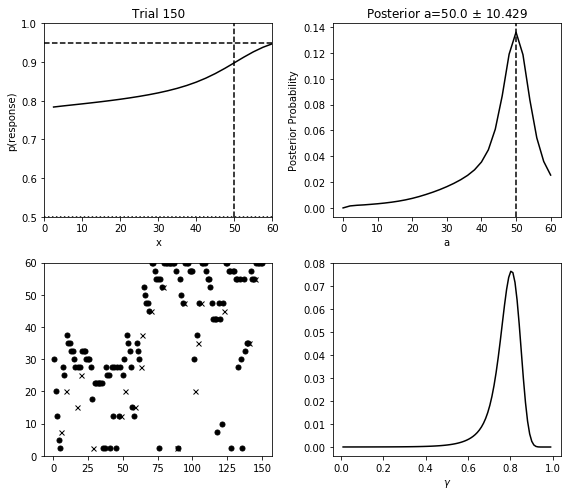

In [8]:
INIT_X = stim[0]

# initialize algorithm
psi = PsiMarginal_fd.Psi(x, Pfunction='Weibull', nTrials=ntrials, threshold=a, slope=b, guessRate=gamma,
                      lapseRate=delta, marginalize=False, init_x=INIT_X)


for i in range(0, ntrials):  # run for length of trials
    print ('\rTrial %d of %d' % (i+1, ntrials), end='')

    data_r = resp[i]
    if i<len(stim)-1: data_x = stim[i+1]
    psi.addData(data_r, data_x)  # update Psi with response
    while psi.xCurrent == None:  # wait until next stimuli is calculated
        pass

psi.plot()


In [9]:
TEMP = True

save_merged_data(TEMP)

new directory TEMP created


In [10]:
if TEMP:
    shutil.rmtree(file_path_TEMP)